# Car Price Prediction (ML Regression)


In this notebook, I have made an attempt to develop a model to predict the car prices using ML Regression.

I have implemented various ML regression models and
finally selected Voting Regressor as it gave me best scores for efficient model deployment.


# Business Goal


It will be used by the management to understand how exactly the prices vary with the independent variables. 
They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\car data.csv")


In [133]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [134]:
data.shape

(301, 9)

In [135]:
data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [136]:
data.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [137]:
data.dtypes


Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [138]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


# Feature Engineering


In [139]:
data.head(80)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
75,etios g,2015,3.95,6.80,36000,Petrol,Dealer,Manual,0
76,corolla altis,2013,5.50,14.68,72000,Petrol,Dealer,Manual,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
78,corolla altis,2010,5.25,22.83,80000,Petrol,Dealer,Automatic,0


In [140]:
data = data.sort_values("Car_Name")


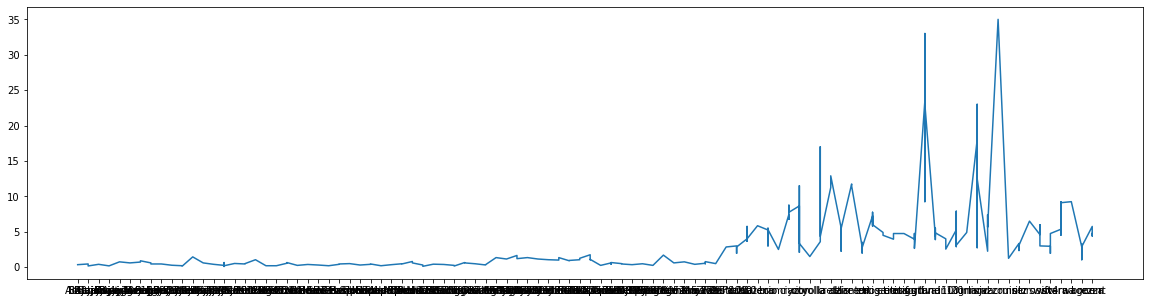

In [141]:
plt.figure(figsize=(20,5))
plt.plot(data['Car_Name'], data['Selling_Price'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 [Text(0, 0, '800'),
  Text(1, 0, 'Activa 3g'),
  Text(2, 0, 'Activa 4g'),
  Text(3, 0, 'Bajaj  ct 100'),
  Text(4, 0, 'Bajaj Avenger 150'),
  Text(5, 0, 'Bajaj Avenger 150 street'),
  Text(6, 0, 'Bajaj Avenger 220'),
  Text(7, 0, 'Bajaj Avenger 220 dtsi'),
  Text(8, 0, 'Bajaj Avenger Street 220'),
  Text(9, 0, 'Bajaj Discover 100'),
  Text(10, 0, 'Bajaj Discover 125'),
  Text(11, 0, 'Bajaj Dominar 400'),
  Text(12, 0, 'Bajaj Pulsar  NS 200'),
  Text(13, 0, 'Bajaj Pulsar 135 LS'),
  Text(14, 0, 'Bajaj Pulsar 150'),
  Text(15, 0, 'Bajaj Pulsar 220 F'),


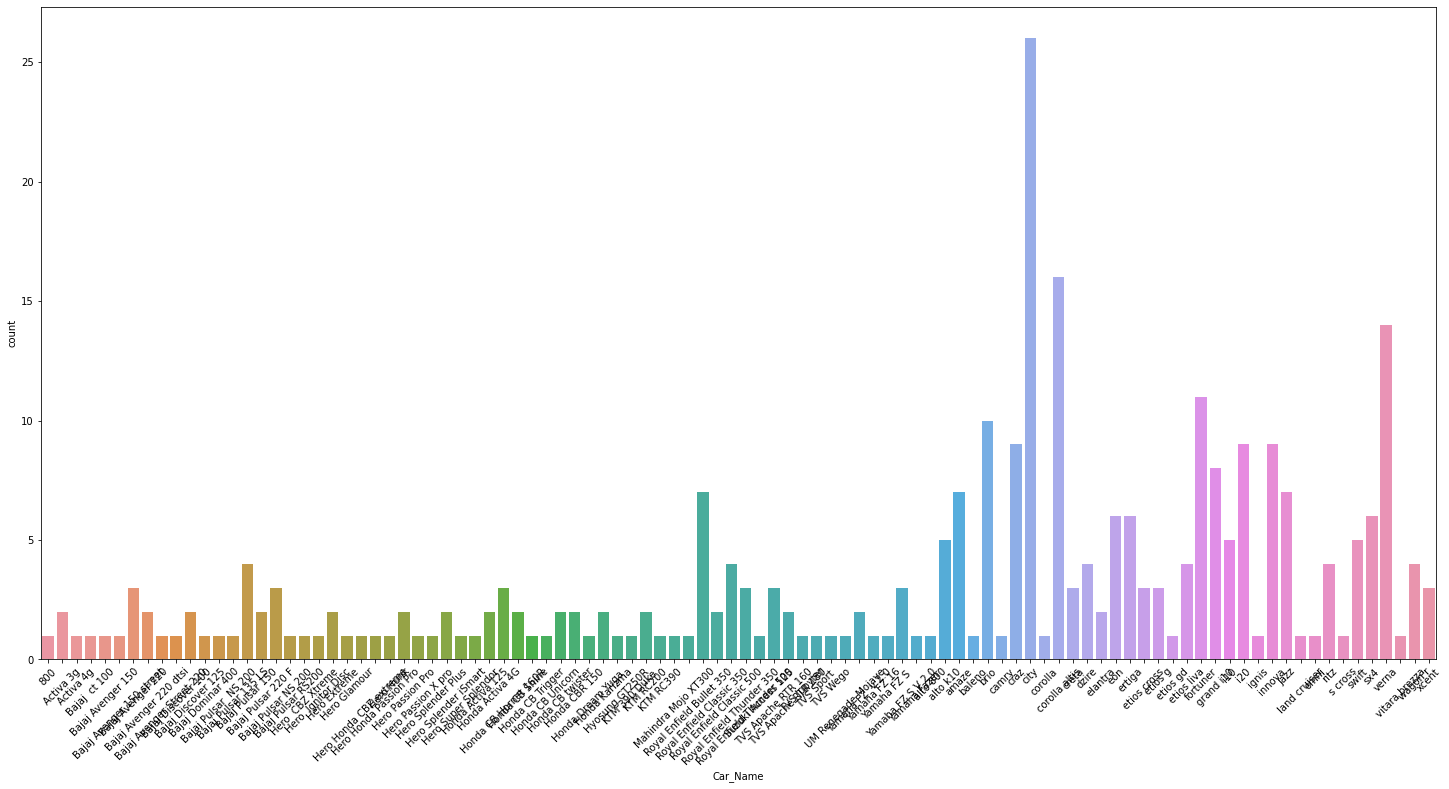

In [142]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Car_Name', data = data)
plt.xticks(rotation = 45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018')])

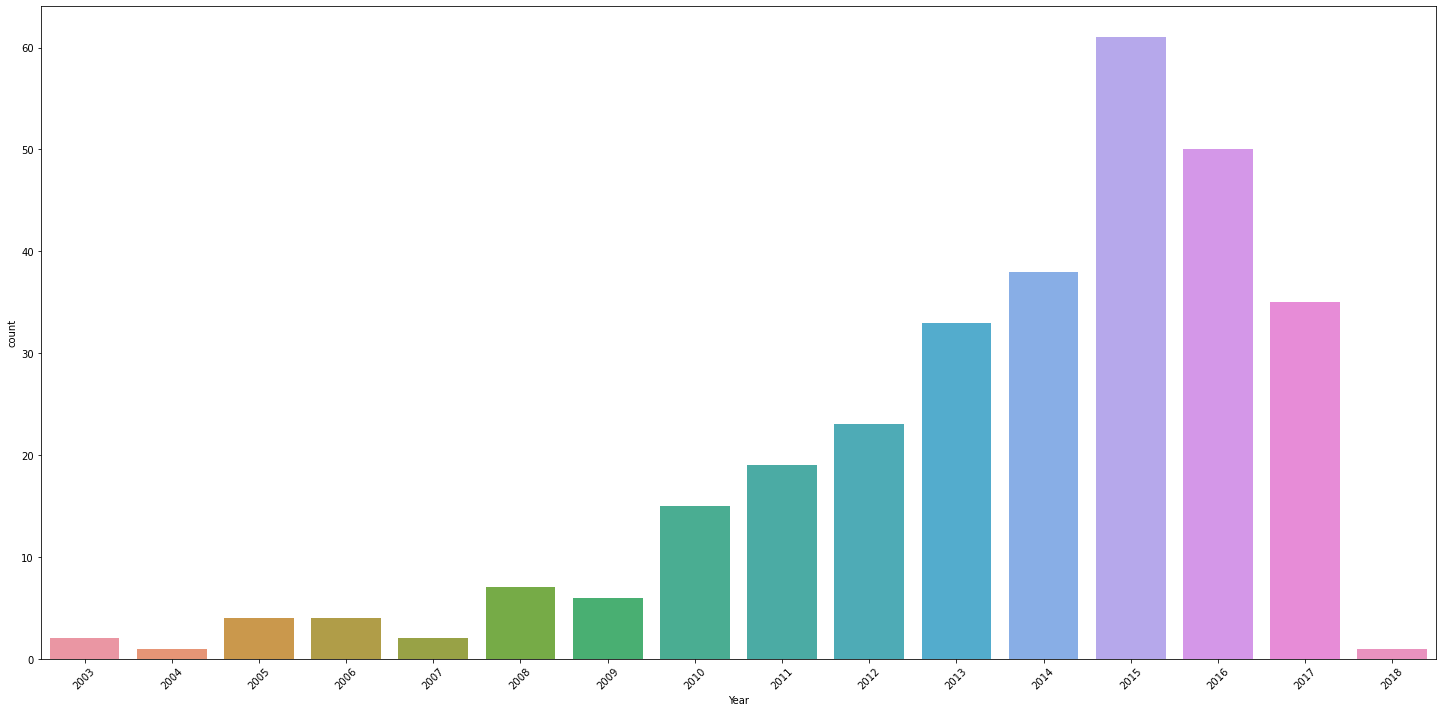

In [143]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Year', data = data)
plt.xticks(rotation = 45)

# Data Visualization 

In [144]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
165,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0
173,Activa 4g,2017,0.40,0.51,1300,Petrol,Individual,Automatic,0
195,Bajaj ct 100,2015,0.18,0.32,35000,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...,...
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
24,wagon r,2013,2.90,4.41,56879,Petrol,Dealer,Manual,0
206,xcent,2017,5.75,7.13,12479,Petrol,Dealer,Manual,0
242,xcent,2014,4.40,7.13,34000,Petrol,Dealer,Manual,0


In [145]:
import matplotlib.pyplot as plt
%matplotlib inline


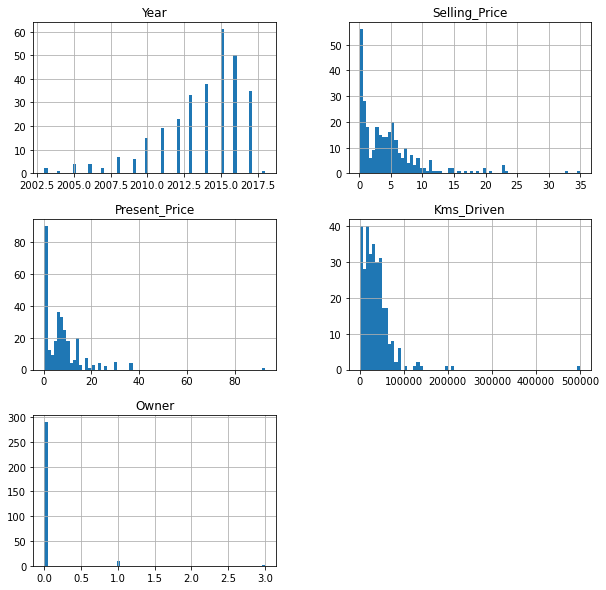

In [146]:
# Plots for categorical attributes
import matplotlib.pyplot as plt
data.hist(bins=70, figsize=(10, 10))
plt.show()

<AxesSubplot:>

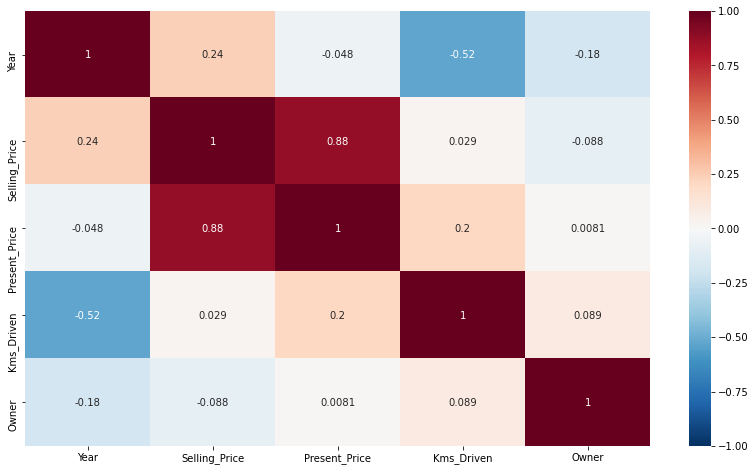

In [147]:
import seaborn as sns 
correlation = data.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


Text(0.5, 1.0, 'Present_Price')

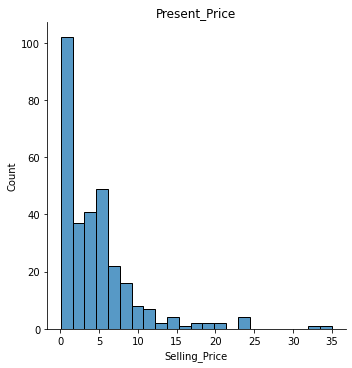

In [148]:
sns.displot(data["Selling_Price"])
plt.title("Present_Price")

In [149]:
cols_drop=['Car_Name', 'Year', 'Selling_Price', 'Present_Price']
cols_drop

['Car_Name', 'Year', 'Selling_Price', 'Present_Price']

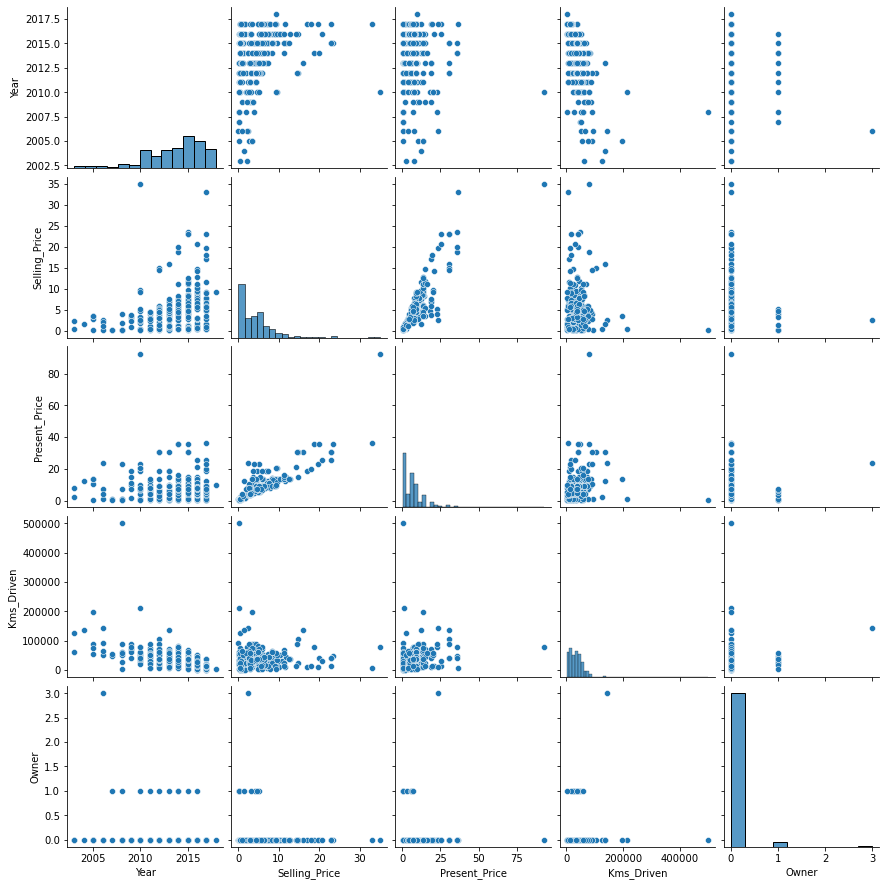

In [150]:
sns.pairplot(data)
plt.show()
